# This dataset contains 7 features and a label column.

long_hair - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".
forehead_width_cm - This column is in CM's. This is the width of the forehead.
forehead_height_cm - This is the height of the forehead and it's in Cm's.
nose_wide - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".
nose_long - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".
lips_thin - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

distance_nose_to_lip_long - This column contains 0's and 1's where 1 represents the "long distance between nose and lips" while 0 is "short distance between nose and lips".

gender - This is either "Male" or "Female".




In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


# upload data

In [3]:
data = pd.read_csv("gender_classification_v7.csv")
data


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
# trans male to 0 and female to 1
data['gender'].replace( 'Female',1,inplace=True)
data['gender'].replace( 'Male',0,inplace=True)
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,1
4997,1,11.9,5.4,0,0,0,0,1
4998,1,12.9,5.7,0,0,0,0,1
4999,1,13.2,6.2,0,0,0,0,1


#  data details

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.7 KB


In [6]:
# no nulls in this data
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
# the data 50% male and 50% female
data['gender'].value_counts()

1    2501
0    2500
Name: gender, dtype: int64

In [8]:
# make list of numerical col
num_col=data.iloc[:, (np.where((data.dtypes == np.int64) | (data.dtypes == np.float64)))[0]].columns

In [9]:
colures=['red','blue','green','yellow','orange','purple','gray','silver','salmon','peru','pink']

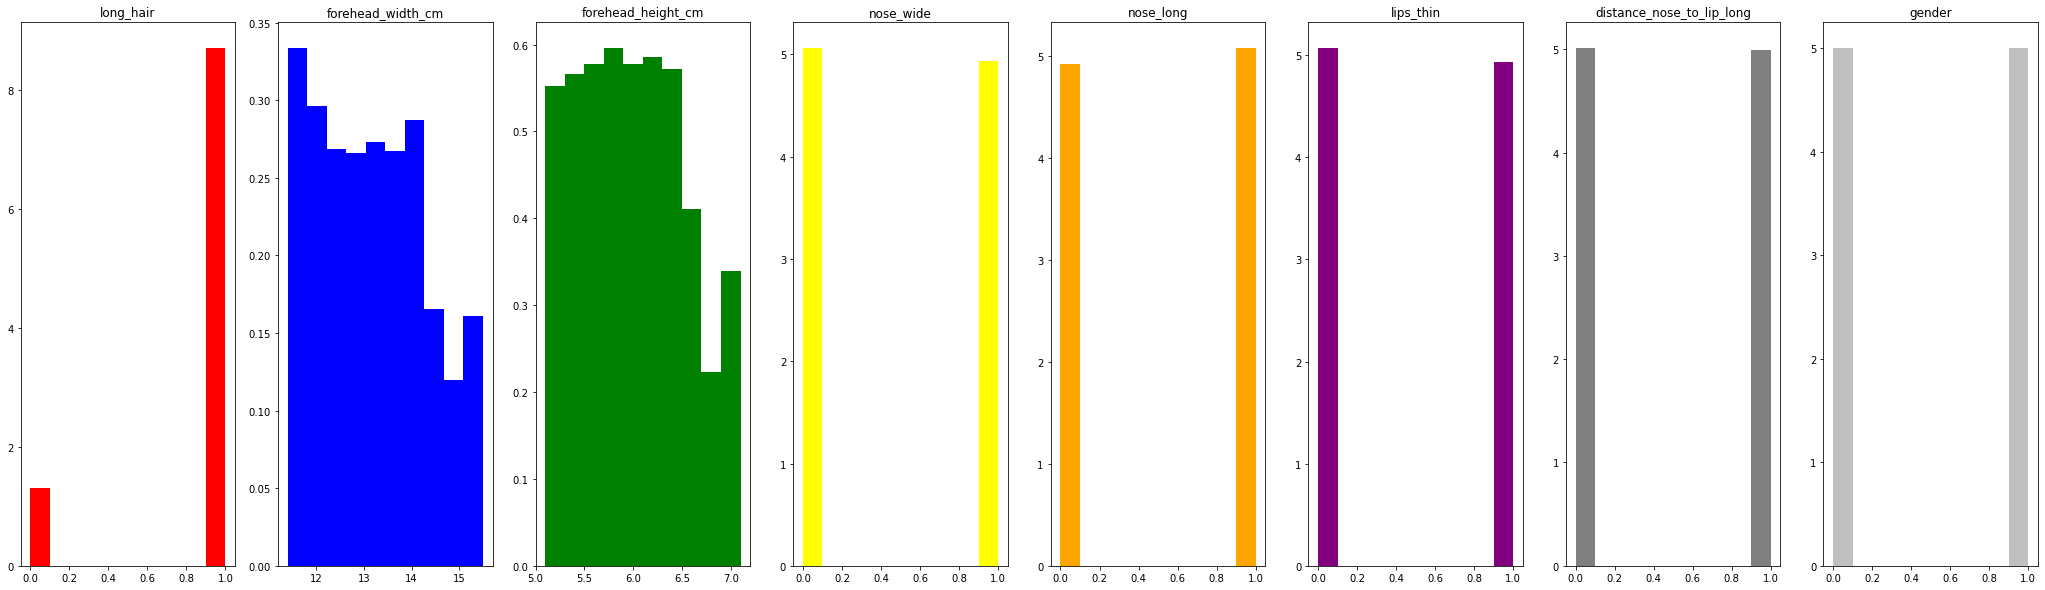

In [10]:
#to check the normality of the distribution

plt.rcParams["figure.figsize"] = (50,10)
plt.xlim([0,100])
a=0
c=-1
for  n in  num_col:
    a=a+1
    c=c+1
    plt.subplot(1, 11, a )
    Age = plt.hist(data[n], density = True, color = colures[c])
    plt.title(n)

In [11]:
corr= data.corr()['gender']
corr

long_hair                    0.010767
forehead_width_cm           -0.334125
forehead_height_cm          -0.277190
nose_wide                   -0.758502
nose_long                   -0.744147
lips_thin                   -0.743319
distance_nose_to_lip_long   -0.754850
gender                       1.000000
Name: gender, dtype: float64

<AxesSubplot:>

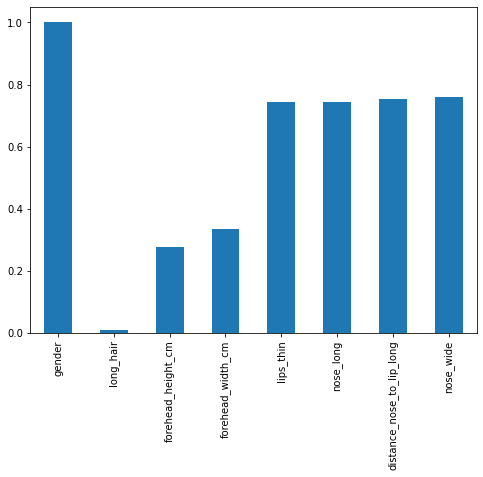

In [12]:
total = corr.sort_values(ascending=False)
total=np.abs(total)
total .sort_values(ascending=False)
total.plot(kind="bar", figsize = (8,6), fontsize = 10)


# data preprocceing


In [13]:
label=data['gender']
features=data.drop('gender',axis=1)

In [14]:
label

0       0
1       1
2       0
3       0
4       1
       ..
4996    1
4997    1
4998    1
4999    1
5000    0
Name: gender, Length: 5001, dtype: int64

In [15]:
features.skew()

long_hair                   -2.196146
forehead_width_cm            0.242242
forehead_height_cm           0.250739
nose_wide                    0.024404
nose_long                   -0.031607
lips_thin                    0.027605
distance_nose_to_lip_long    0.004400
dtype: float64

In [16]:
skew=features.skew()[np.abs(features.skew())>0.5]
skew

long_hair   -2.196146
dtype: float64

In [17]:
features['long_hair']=np.log(features['long_hair']+1)

In [18]:
features.skew()

long_hair                   -2.196146
forehead_width_cm            0.242242
forehead_height_cm           0.250739
nose_wide                    0.024404
nose_long                   -0.031607
lips_thin                    0.027605
distance_nose_to_lip_long    0.004400
dtype: float64

# i will drop long_hair so this skew is high and corr is low

In [19]:
features.drop('long_hair',axis=1)

,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,11.8,6.1,1,0,1,1
1,14.0,5.4,0,0,1,0
2,11.8,6.3,1,1,1,1
3,14.4,6.1,0,1,1,1
4,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...
4996,13.6,5.1,0,0,0,0
4997,11.9,5.4,0,0,0,0
4998,12.9,5.7,0,0,0,0
4999,13.2,6.2,0,0,0,0


# minmax scale

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
features

array([[1.        , 0.09756098, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.63414634, 0.15      , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.09756098, 0.6       , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.36585366, 0.3       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43902439, 0.55      , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.97560976, 0.15      , ..., 1.        , 1.        ,
        1.        ]])

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split (features ,label, test_size=0.2, random_state=0)
print("Training  set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training  set has 4000 samples.
Testing set has 1001 samples.


In [22]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
# TODO: import the three selcted models
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
# TODO:fit The three slected models with training and testing data
model1=DecisionTreeClassifier()
model2=SVC()
model3=AdaBoostClassifier()
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
y_train_pred1=model1.predict(X_train)
y_test_pred1=model1.predict(X_test)
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)
y_train_pred3=model3.predict(X_train)
y_test_pred3=model3.predict(X_test)

#TODO :  Calculate the accuracy score for both the training  and testing set for model 1
train_acc1=accuracy_score(y_train,y_train_pred1)
test_acc1=accuracy_score(y_test,y_test_pred1)
print("training accuracy for model 1:",round(train_acc1*100),"%")
print("testing accuracy for model 1:",round(test_acc1*100),"%")

#TODO :  Calculate the F-score for both the training subset and testing set for model 1
fbeta_train1=fbeta_score(y_train,y_train_pred1,beta=0.5)
fbeta_test1=fbeta_score(y_test,y_test_pred1,beta=0.5)
print("training fbeta for model 1:",round(fbeta_train1*100),"%")
print("testing fbeta for model 1:",round(fbeta_test1*100),"%")

print(    )

#TODO :  Calculate the accuracy score for both the training  and testing set for model 2
train_acc2=accuracy_score(y_train,y_train_pred2)
test_acc2=accuracy_score(y_test,y_test_pred2)
print("training accuracy for model 2:",round(train_acc2*100),"%")
print("testing accuracy for model 2:",round(test_acc2*100),"%")

#TODO :  Calculate the F-score for both the training subset and testing set for model 2
fbeta_train2=fbeta_score(y_train,y_train_pred2,beta=0.5)
fbeta_test2=fbeta_score(y_test,y_test_pred2,beta=0.5)
print("training fbeta for model 2:",round(fbeta_train2*100),"%")
print("testing fbeta for model 2:",round(fbeta_test2*100),"%")
print(    )


#TODO :  Calculate the accuracy score for both the training  and testing set for model 3
train_acc3=accuracy_score(y_train,y_train_pred3)
test_acc3=accuracy_score(y_test,y_test_pred3)
print("training accuracy for model 3:",round(train_acc3*100),"%")
print("testing accuracy for model 3:",round(test_acc3*100),"%")

#TODO :  Calculate the F-score for both the training subset and testing set for model 3
fbeta_train3=fbeta_score(y_train,y_train_pred3,beta=0.5)
fbeta_test3=fbeta_score(y_test,y_test_pred3,beta=0.5)
print("training fbeta for model 3:",round(fbeta_train3*100),"%")
print("testing fbeta for model 3:",round(fbeta_test3*100),"%")


training accuracy for model 1: 100 %
testing accuracy for model 1: 96 %
training fbeta for model 1: 100 %
testing fbeta for model 1: 96 %

training accuracy for model 2: 97 %
testing accuracy for model 2: 97 %
training fbeta for model 2: 97 %
testing fbeta for model 2: 96 %

training accuracy for model 3: 98 %
testing accuracy for model 3: 97 %
training fbeta for model 3: 97 %
testing fbeta for model 3: 97 %


In [23]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)


y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)



#TODO :  Calculate the accuracy score for both the training  and testing set for model 3
train_acc4=accuracy_score(y_train,y_train_pred4)
test_acc4=accuracy_score(y_test,y_test_pred4)
print("training accuracy for model 4:",round(train_acc3*100),"%")
print("testing accuracy for model 4:",round(test_acc3*100),"%")

#TODO :  Calculate the F-score for both the training subset and testing set for model 3
fbeta_train4=fbeta_score(y_train,y_train_pred4,beta=0.5)
fbeta_test4=fbeta_score(y_test,y_test_pred4,beta=0.5)
print("training fbeta for model 4:",round(fbeta_train3*100),"%")
print("testing fbeta for model 4:",round(fbeta_test3*100),"%")


training accuracy for model 4: 98 %
testing accuracy for model 4: 97 %
training fbeta for model 4: 97 %
testing fbeta for model 4: 97 %
